<a href="https://colab.research.google.com/github/leobioinf0/4YFNMWC2022/blob/main/4YFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install/upgrade

In [ ]:
!pip3 install --upgrade matplotlib
!pip3 install --upgrade scikit-learn
!pip3 install --upgrade numpy
!pip3 install --upgrade pandas
!pip3 install --upgrade seaborn

## Import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import plotly.io as pio
from sklearn.cluster import KMeans
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from IPython.display import Image, display
from IPython.display import HTML
from matplotlib import animation
import pandas as pd
import matplotlib.ticker as ticker
from pandas.api.types import infer_dtype
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_bool_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_dtype
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
sns.set_theme(style="whitegrid")
init_notebook_mode(connected=True)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
pio.renderers.default = "colab"
%matplotlib inline

## Functions

In [2]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

import math
def rounder(n):
    """
    Round up to the first digit that is not zero
    """
    if n == 0:
        return n
    else:
        k = 1 - int(math.log10(n))
        return round(n, 1 if n > 1 else k)

def describer(dataframe):
    """
    description of dataframe
    """
    desc_df = round(dataframe.describe(include="all"),2).T
    desc_df["unique"]=dataframe.nunique()
    desc_df["NullAny"]= dataframe.isnull().any()
    desc_df["NullSum"]=dataframe.isnull().sum()
    desc_df["NullPct"]=(dataframe.isnull().sum()/len(dataframe)*100).apply(rounder)
    desc_df["dtypes"]=dataframe.dtypes
    desc_df["dtypes"] = desc_df["dtypes"].astype('category')
    desc_df.sort_values(by="dtypes", inplace=True)
    return(desc_df)
def label(x, color, label):
    '''
    create labels for joy plot
    '''
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)

def plot_joy(df, col, clusters):
    '''
    Create Joyplot
    '''
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})
    n_clus=len(df[clusters].unique())
    pal = sns.cubehelix_palette(n_colors=n_clus, rot=.25, light=.7)
    g = sns.FacetGrid(df, 
                        row=clusters, 
                        hue=clusters, 
                        aspect=15, height=1, palette=pal)
    g.map(sns.kdeplot, col, bw_adjust=.8, clip_on=False, fill=True, alpha=.8, linewidth=1.5)
    g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)
    g.map(label, col)
    g.figure.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.fig.suptitle("Distribution of {} in each {}".format(col, clusters))
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    return g
def custom_plots(dat, color, title, ax=None, cW=None):
    '''
    Generate proportion histogram and tescriptive table of variable 
    taking into account the type of data
    ''' 
    if ax is None:
        ax = plt.gca()
    if is_categorical_dtype(dat):
        desc_table = dat.describe().to_frame().T
        if dat.nunique() > 31:
            top20 = dat.value_counts().head(20)/len(dat)
            ax.barh(y=top20.index,
                    width=top20,
                    color=color)
            title = title + ' ' +"Top-20"
        else:
            sns.countplot(x=dat, ax=ax)


    elif is_bool_dtype(dat):
        desc_table = dat.describe().to_frame().T
        ax.pie(dat.value_counts(),
               labels = dat.unique(),
               startangle=45,
               autopct=lambda p: '{:.3f}%({:.0f})'.format(p,(p/100)*len(dat)))


    elif infer_dtype(dat) == "O":
        desc_table = dat.describe().to_frame().T
        sns.histplot(x=dat, stat="count", color=color,
                     kde=True, ax=ax)
    else:
        desc_table = round(dat.describe(),2).to_frame().T
        
        if dat.nunique() == 2:
            ax.pie(dat.value_counts(),
               labels = dat.unique(),
               startangle=45,
               autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*len(dat)))
        
        elif dat.nunique() == 6:
            sns.countplot(x=dat, ax=ax)
        else:
            sns.histplot(x=dat, stat="count", color=color,kde=True, ax=ax)
    
    the_table = ax.table(cellText=desc_table.values,
            colLabels=desc_table.columns,
            loc='top',
            colWidths=cW)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9)

    ax.set_title(title + ' ' + dat.name,
                 fontsize = 14,
                 fontweight = "bold",
                 loc='center',
                 pad=31)
    ax.set_xlabel("")
    return(ax)

def animate(frame):
    '''
    Animate frames
    '''
    ax.view_init(elev=20, azim=frame)
    plt.pause(.001)
    return fig

## client table

Then, I load the data. Once done, I also give some basic informations on the content of the dataframe: the type of the various variables, the number of null values and their percentage with respect to the total number of entries:

In [3]:
url1="https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-client_table.csv"
client_table = pd.read_csv(url1,
                           decimal=',',
                           dtype={'CLIENT ID': "category",
                                  'CLIENT_SEGMENT': "category",
                                  'RECEIVED_COMMUNICATION': "category"})
client_table.columns = client_table.columns.str.replace(" ","_").str.lower()
print('Dataframe dimensions:', client_table.shape)
client_table.head()

Dataframe dimensions: (35884, 5)


,client_id,client_segment,avg_conso,avg_basket_size,received_communication
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0


In [4]:
describer(client_table)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,NullAny,NullSum,NullPct,dtypes
client_id,35884,35884,18073108,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category
client_segment,35884,6,3,8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category
avg_conso,35884.0,1494,NaN,NaN,64.53,64.38,0.83,20.83,50.0,88.17,2433.33,False,0,0.0,float64
avg_basket_size,35884.0,3974,NaN,NaN,181.22,129.6,10.0,100.0,160.0,225.0,3400.2,False,0,0.0,float64
received_communication,35884,2,1,18229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category


I check for duplicate entries:

In [5]:
print('Duplicate entries: {}'.format(client_table.duplicated().sum()))

Duplicate entries: 0


  0%|          | 0/4 [00:00<?, ?it/s]

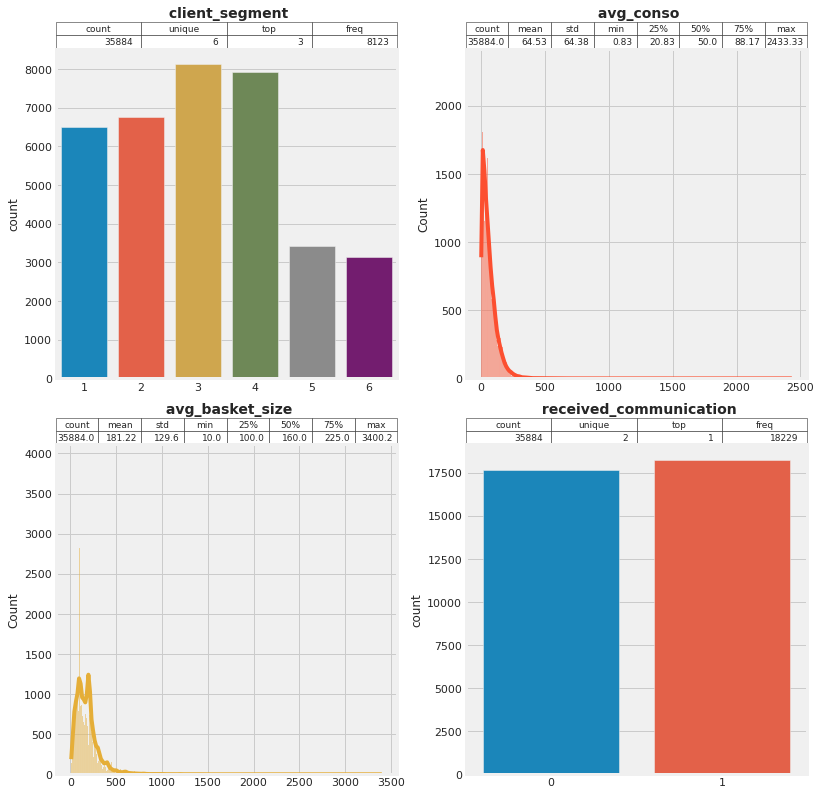

In [6]:
#Distribution of the  variables

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
axes = axes.flat

for i, colum in enumerate(tqdm_notebook(['client_segment', 'avg_conso', 'avg_basket_size', 'received_communication'])):
        datos = client_table[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, 
                     color=clr, 
                     title="", 
                     ax=axes[i])
plt.subplots_adjust(top=0.965)
plt.show()

avg_conso                                                       
                   count    mean     std    min    25%     50%     75%      max
client_segment                                                                 
1                 6505.0  132.28   59.09  37.50  94.17  117.50  155.83   862.58
2                 6760.0   87.36   41.75  16.67  66.67   79.17  100.00  1416.75
3                 8123.0   43.33   14.11  10.00  33.33   41.67   50.83   151.67
4                 7927.0   20.87   11.24   0.83  12.58   19.17   25.83   166.75
5                 3429.0    6.60    3.48   0.83   4.17    6.42    8.33    20.83
6                 3140.0  103.40  117.31   0.83  33.33   75.00  137.50  2433.33

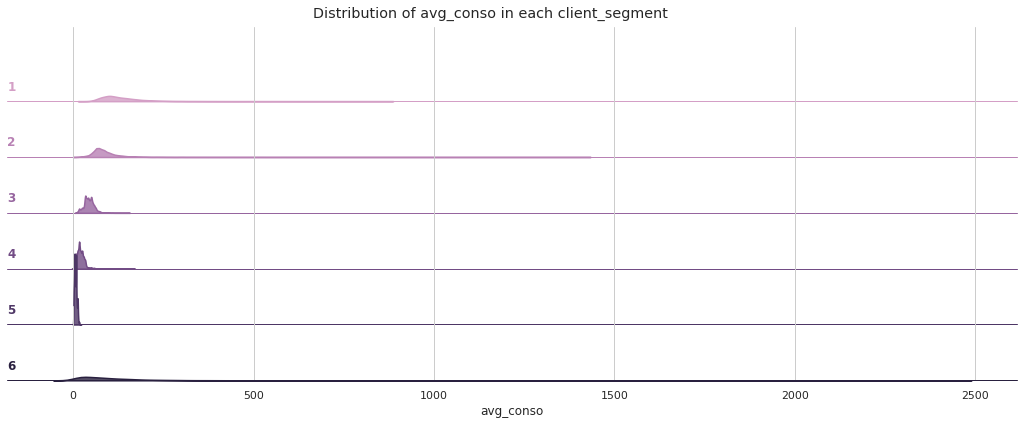

avg_basket_size                  ...                         
                         count    mean     std  ...     50%     75%      max
client_segment                                  ...                         
1                       6505.0  190.34   84.78  ...  185.71  220.00  1400.00
2                       6760.0  298.60  142.27  ...  252.33  343.33  3400.20
3                       8123.0  163.60   71.46  ...  152.00  200.00   750.00
4                       7927.0  105.48   54.51  ...  100.00  125.00   500.00
5                       3429.0   56.87   31.19  ...   50.00   75.00   200.00
6                       3140.0  282.21  198.83  ...  233.33  360.00  2654.55

[6 rows x 8 columns]

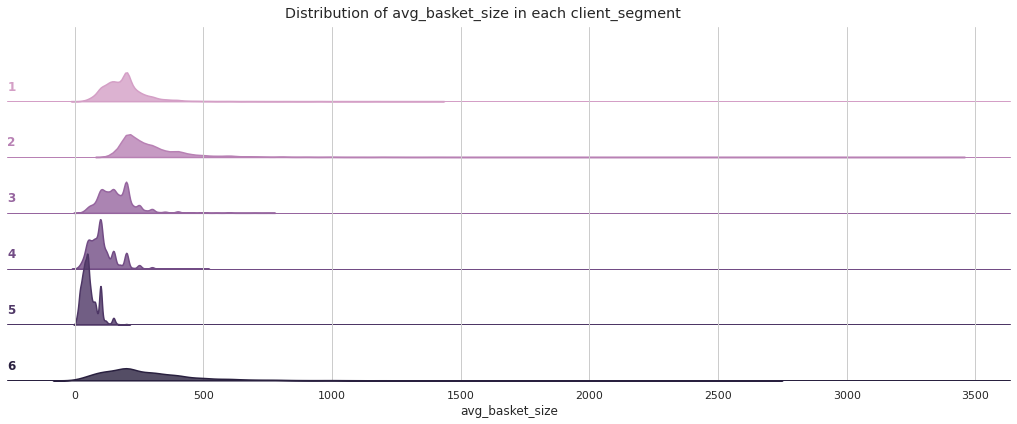

avg_conso                ...                       
                           count   mean    std  ...    50%    75%      max
received_communication                          ...                       
0                        17655.0  53.08  55.64  ...  34.17   75.0  1116.67
1                        18229.0  75.63  70.08  ...  59.17  100.0  2433.33

[2 rows x 8 columns]

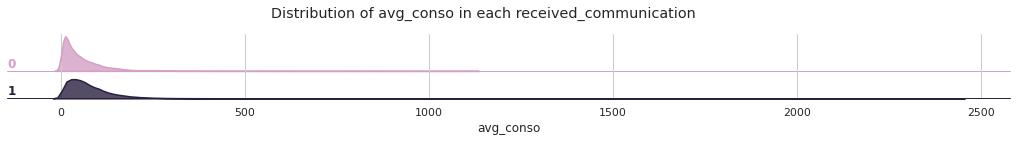

avg_basket_size                  ...                       
                                 count    mean     std  ...     50%    75%     max
received_communication                                  ...                       
0                              17655.0  161.88  119.44  ...  145.00  200.0  1675.0
1                              18229.0  199.95  136.15  ...  183.33  250.0  3400.2

[2 rows x 8 columns]

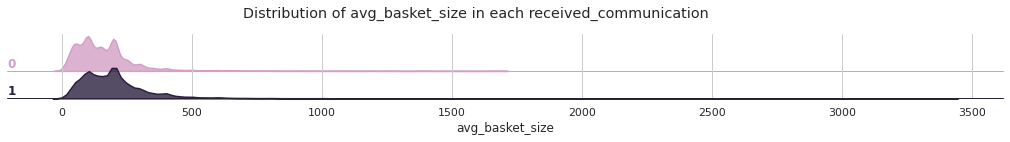

In [7]:
#joyplot

for col in ['avg_conso', 'avg_basket_size']:
    display(client_table.groupby(by='client_segment').describe().round(2)[[col]])
    plot_joy(client_table, col, 'client_segment')
    plt.show()
    
for col in ['avg_conso', 'avg_basket_size']:   
    display(client_table.groupby(by='received_communication').describe().round(2)[[col]])
    plot_joy(client_table, col, 'received_communication')
    plt.show()

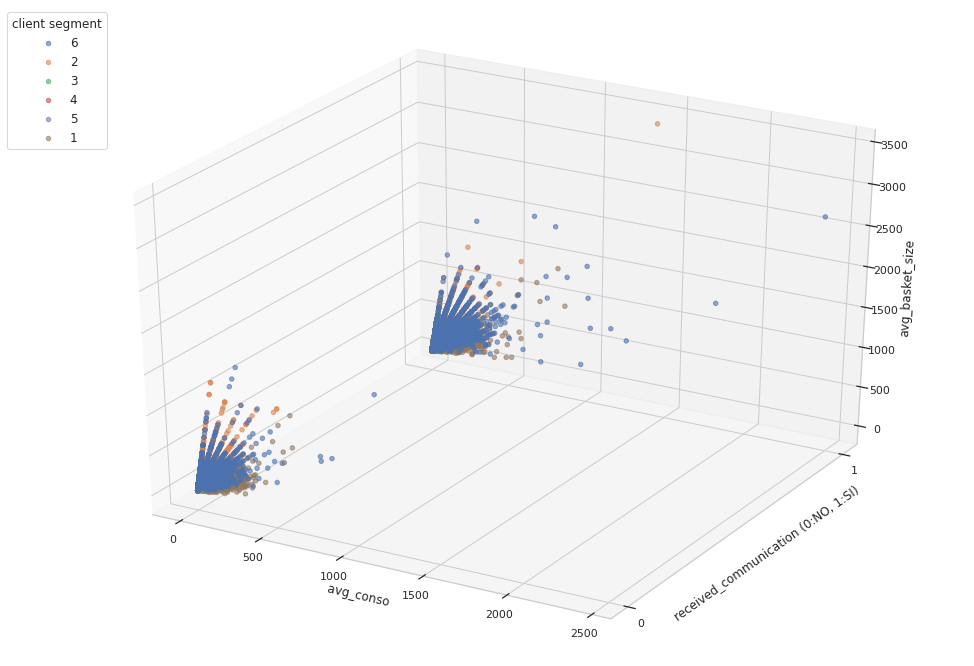

In [8]:
#3d scatter
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
sns.set_theme(style="whitegrid")
for s in client_table.client_segment.unique():
    ax.scatter(client_table.avg_conso[client_table.client_segment==s], 
                   client_table.received_communication[client_table.client_segment==s], 
                   client_table.avg_basket_size[client_table.client_segment==s],
                   label=s, alpha=0.6)

ax.set(xlabel='avg_conso ',
          ylabel='received_communication (0:NO, 1:SI)',
          zlabel='avg_basket_size')
plt.legend(title='client segment', fontsize=12,bbox_to_anchor=(0.09, 1))
plt.show()

In [ ]:
#3d scatter animation
anim = animation.FuncAnimation(fig, animate, frames=360, interval=50)
HTML(anim.to_html5_video())

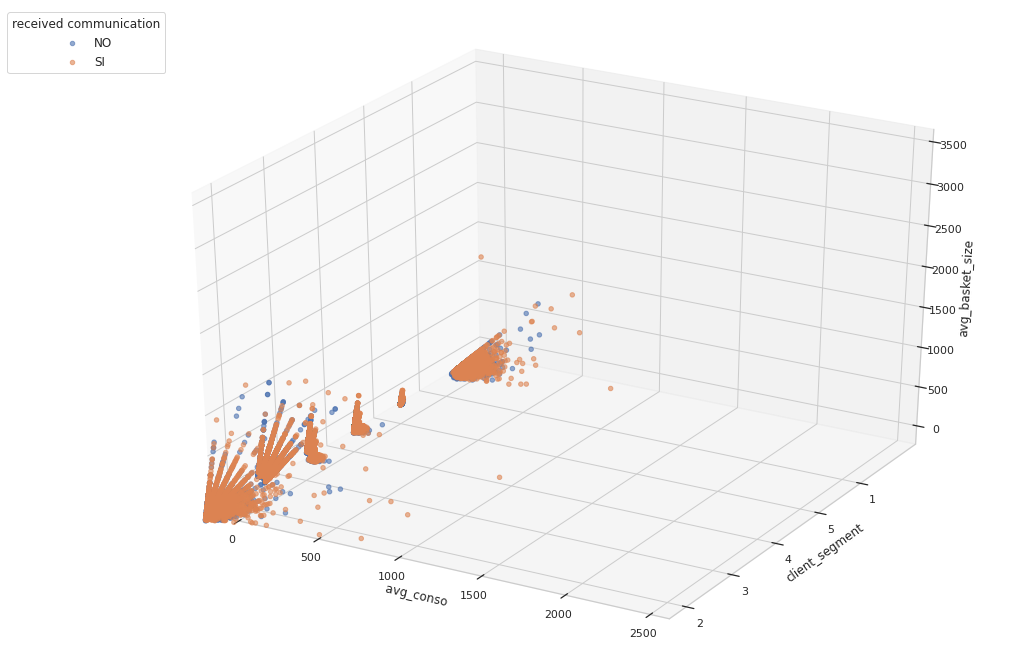

In [9]:
#3d scatter
fig2 = plt.figure(figsize=(15,12))
ax = fig2.add_subplot(111, projection='3d')
sns.set_theme(style="whitegrid")
for s in client_table.received_communication.unique():
    ax.scatter(client_table.avg_conso[client_table.received_communication==s], 
                   client_table.client_segment[client_table.received_communication==s], 
                   client_table.avg_basket_size[client_table.received_communication==s],
                   label=s, alpha=0.6)

ax.set(xlabel='avg_conso ',
          ylabel='client_segment',
          zlabel='avg_basket_size')
plt.legend(title='received communication', fontsize=12,bbox_to_anchor=(0.09, 1), labels=["NO", "SI"])
plt.show()

In [ ]:
#3d scatter animation
anim = animation.FuncAnimation(fig2, animate, frames=90, interval=50)
HTML(anim.to_html5_video())

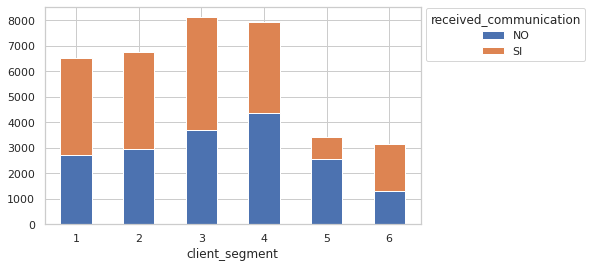

In [12]:
# crosstab segment /promo
ct = pd.crosstab(client_table.client_segment, client_table.received_communication).rename(columns={"0":"NO","1":"SI"})
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='received_communication', bbox_to_anchor=(1, 1.02), loc='upper left')

## orders table

In [13]:
url2="https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-orders_table.csv"
orders_table = pd.read_csv(url2, dtype={'CLIENT ID': "category", 
                                        'ORDER ID': "category", 
                                        "FRUIT_PRODUCT": "category"})
orders_table.columns = orders_table.columns.str.replace(" ","_").str.lower()
print('Orders table dimensions:', orders_table.shape)
orders_table.head()

Orders table dimensions: (66912, 4)


,client_id,nb_prods,order_id,fruit_product
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


We see that there is more order id than customers id. for which the same client has made more than one order

In [14]:
describer(orders_table)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,NullAny,NullSum,NullPct,dtypes
client_id,66912,14499,18851598,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category
nb_prods,66912.0,82,NaN,NaN,4.53,5.79,-80.0,1.0,3.0,5.0,198.0,False,0,0.0,int64
order_id,66912,17458,667989609,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category
fruit_product,66912,24,Kiwi,6431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0.0,category


I check for duplicate entries:

In [15]:
print('Duplicate entries: {}'.format(orders_table.duplicated().sum()))

Duplicate entries: 616


In [16]:
pd.DataFrame([{'products': len(orders_table['fruit_product'].value_counts()),    
               'orders': len(orders_table['order_id'].value_counts()),
               'customers': len(orders_table['client_id'].value_counts()),  
              }], columns = ['products', 'orders', 'customers'], index = ['n_unique'])

,products,orders,customers
n_unique,24,17458,14499


It can be seen that the data contains 14,499 users and that they bought 24 different products. The total number of ORDERS carried out is 17,458.

		

In [17]:
#we check that the same customer can make more than one order
(orders_table.groupby('client_id')['order_id'].nunique() > 1).any()

True

In [18]:
#we check that an order can be made only by a single customer
(orders_table.groupby('order_id')['client_id'].nunique() > 1).any()

False

Some customers have a negative total nb_prods of products purchased (e.g. client_id 42742047).

In [19]:
orders_table.sort_values(by=["nb_prods"])

,client_id,nb_prods,order_id,fruit_product
63380,42742047,-80,664120136,Orange
18168,20377967,-40,670198442,Orange
47556,24877844,-40,663838938,Kiwi
18171,20377967,-40,668389842,Orange
34884,39293252,-40,667139243,Kiwi
...,...,...,...,...
20638,20721198,100,668395689,Cheery
56718,25417539,102,675961989,Kiwi
32129,22116141,120,674347996,Lemon
41010,24477147,180,673919468,Cheery


If we inspect these orders we can see that they indicate canceled transactions or product returns.



In [20]:
orders_table[orders_table.client_id == "42742047"]

,client_id,nb_prods,order_id,fruit_product
63378,42742047,35,670844018,Jackfruit
63379,42742047,-35,664120136,Jackfruit
63380,42742047,-80,664120136,Orange
63381,42742047,80,670844018,Orange


We see that returns/cancellations are recorded as an order with a negative **nb_prods**.


In [21]:
orders_table[orders_table.client_id == "24790894"]

,client_id,nb_prods,order_id,fruit_product
46209,24790894,-30,666610887,Apricot
46210,24790894,-15,666610887,Strawberry


Some customers only have returns registered. We can interpret that the acquisitions of these products were registered in the year 2019, and the cancellations in 2020.

In [22]:
#on average each customer has made 1.2 orders
orders_table.groupby('client_id')['order_id'].nunique().values.mean()

1.2040830402096696

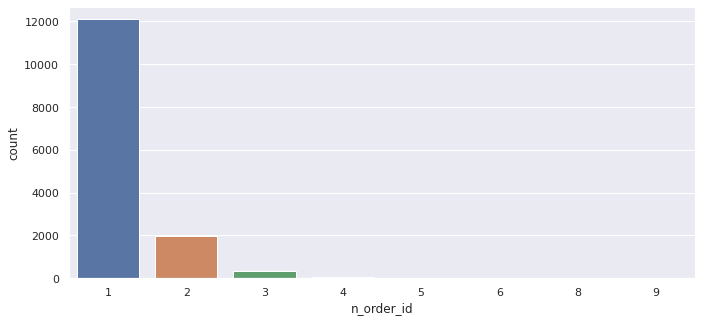

In [23]:
orders_info = pd.DataFrame(orders_table.groupby('client_id')['order_id'].nunique()).rename(columns = {'order_id':'n_order_id'})
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="n_order_id", data=orders_info)
plt.show()

- most customers have placed only one order in 2020
- Some customers have made multiple orders. These could be considered frequent customers.

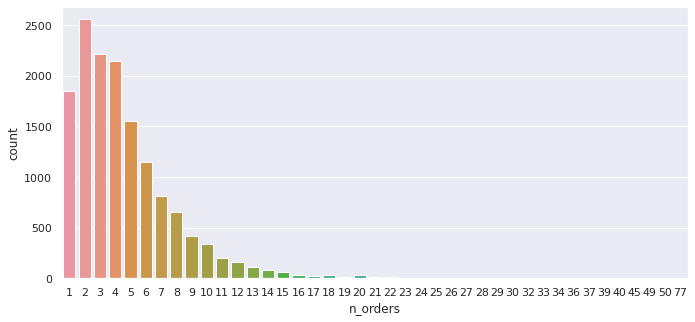

In [24]:
orders_info["n_orders"] = orders_table.groupby('client_id')[['nb_prods']].count()
sns.countplot(x="n_orders", data=orders_info)
plt.show()

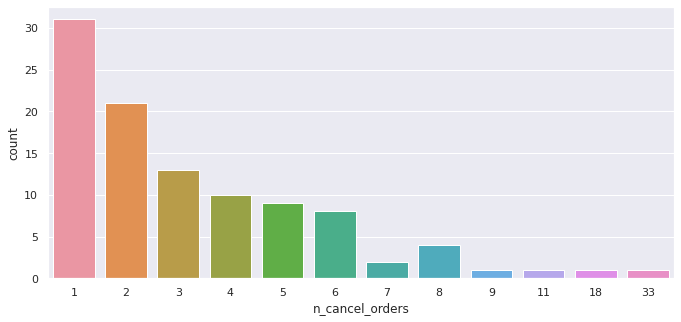

In [26]:
orders_info["n_cancel_orders"] = orders_table[orders_table.nb_prods < 0].groupby('client_id')[['nb_prods']].count()
sns.countplot(x="n_cancel_orders",  data=orders_info[orders_info.n_cancel_orders>0])
plt.show()

In [27]:
#on average each customer has purchased 20.89 "prod" units
orders_table.groupby('client_id')['nb_prods'].sum().values.mean()

20.896958410924892

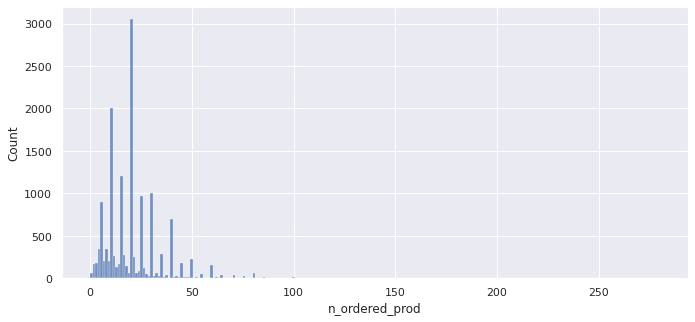

In [28]:
orders_info["n_ordered_prod"] = orders_table[orders_table.nb_prods > 0].groupby('client_id')['nb_prods'].sum()
sns.histplot(x="n_ordered_prod", data=orders_info)
plt.show()

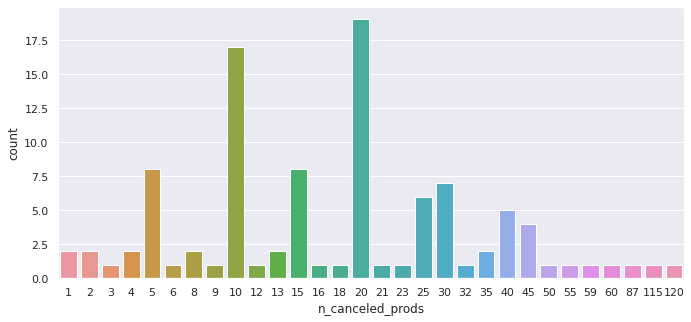

In [29]:
orders_info["n_canceled_prods"] = orders_table[orders_table.nb_prods <= 0].groupby('client_id')[['nb_prods']].sum().abs()
sns.countplot(x="n_canceled_prods",  data=orders_info[orders_info.n_canceled_prods>0])
plt.show()

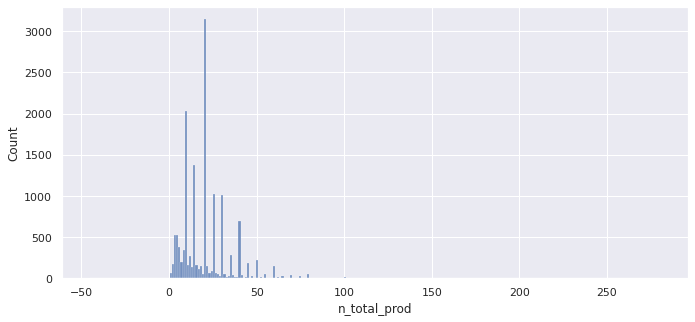

In [30]:
orders_info["n_total_prod"] = orders_table.groupby('client_id')['nb_prods'].sum()
sns.histplot(x="n_total_prod",  data=orders_info)
plt.show()

In [31]:
#on average each customer has purchased 4.06 different "prod"
orders_table.groupby('client_id')['fruit_product'].nunique().values.mean()

4.0607628112283605

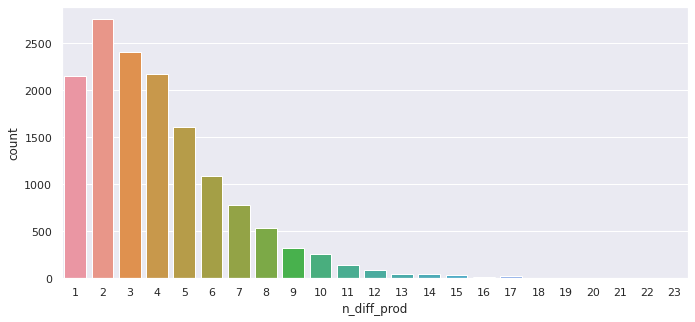

In [32]:
orders_info["n_diff_prod"] = orders_table.groupby('client_id')['fruit_product'].nunique()
sns.countplot(x="n_diff_prod", data=orders_info)
plt.show()

In [33]:
print("number of Customers who have made cancellations: {}".format(orders_info[orders_info.n_cancel_orders>0].shape[0]))
print("number of Customers who canceled their order without having placed any order in the year 2020: {}".format(orders_info[orders_info.n_total_prod<0].shape[0]))

number of Customers who have made cancellations: 102
number of Customers who canceled their order without having placed any order in the year 2020: 12


In [34]:
fruit = orders_table.groupby(by=['client_id','fruit_product'])[['nb_prods']].sum().reset_index().pivot(index='client_id', columns='fruit_product', values='nb_prods')

In [35]:
orders_info = orders_info.merge(fruit, left_index=True, right_index=True)

In [36]:
client_table.set_index("client_id", inplace=True, drop=True)

In [37]:
df = client_table.merge(orders_info, left_index=True, right_index=True)

# Predictions

In [38]:
matrix = df.drop(columns="client_segment").values

In [39]:
scaler = MinMaxScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

In [40]:
X = matrix
Y = df['client_segment']

In [41]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8, random_state=0,stratify=Y)




###SVC


In [429]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict(X_test, Y_test)

Precision: 66.75 % 





###Logistic Regression


In [435]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = )
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 58.05 % 


In [ ]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 86.29 % 


### k-Nearest Neighbors

In [436]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 2)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 79.92 % 


### Decision Tree

In [437]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 2)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 66.57 % 


### Random Forest

In [438]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 2)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 79.72 % 


### AdaBoost Classifier

In [439]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 2)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 46.77 % 


###Gradient Boosting Classifier

In [440]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 2)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 81.30 % 


# model selection

In [441]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [442]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')    

In [443]:
votingC = votingC.fit(X_train, Y_train)

In [444]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 81.23 % 


# f1_score

In [464]:
f1_score(Y_test, predictions, average='macro')

0.6997980128017723